In [1]:
import time
from typing import Literal, cast, List

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from scipy.ndimage.interpolation import shift


# Exercises

1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the `KNeighborsClassifier` works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
`weights` and `n_neighbors` hyperparameters).

In [2]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist.data, mnist.target

X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

some_digit = X[0]

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_predict = cross_val_predict(
    knn_clf, X_train, y_train, cv=3, n_jobs=3)

In [ ]:
f1_score(y_train, y_train_knn_predict, average="macro")

Very good score 96.722% !

# Try `GridSearchCV` optimization

In [ ]:
start_time = time.perf_counter()

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(
    knn_clf,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    verbose=3
)
grid_search.fit(X_train, y_train)

end_time = time.perf_counter()

print(end_time - start_time, "seconds")

# Let's take a look what are the best options that we have and score

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

2. Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel. Then, for each image in the training set, create four shifted
copies (one per direction) and add them to the training set. Finally, train your
best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of
artificially growing the training set is called data augmentation or training set
expansion.

In [5]:


def shift_image(image: np.ndarray, dy: int, dx: int) -> np.ndarray:
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape(-1)



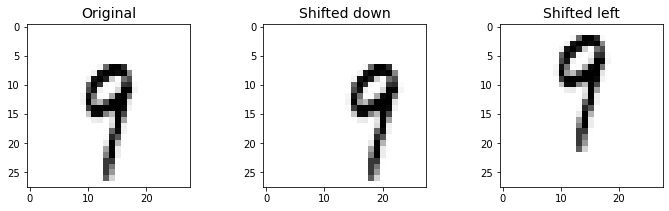

In [6]:
image = X_train[600]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()


In [7]:
X_train_a = [image for image in X_train]
y_train_a = [label for label in y_train]

print(len(X_train_a), len(y_train_a))

for image, label in zip(X_train, y_train):
    for dy, dx in ((1, 0), (-1, 0), (0, 1), (0, -1)):
        shifted_image = shift_image(image, dy, dx)
        X_train_a.append(shifted_image)
        y_train_a.append(label)

X_train_augmented = np.array(X_train_a)
y_train_augmented = np.array(y_train_a)

print(len(X_train_augmented), len(y_train_augmented))

60000 60000
300000 300000


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_augmented_knn_predict = cross_val_predict(
    knn_clf, X_train_augmented, y_train_augmented, cv=3, n_jobs=3)

In [ ]:
f1_score(y_train, y_train_augmented_knn_predict, average="macro")
